In [48]:
import sys
assert sys.version_info >= (3, 5)

import pandas as pd
import numpy as np
import os

# Import Matplotlib and Seaborn
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import seaborn as sns

##  A few useful functions and setup items
# Changing directories
def change_dir(num_steps_back='..', path_ext):
    """
    :param path_ext: the desired path within project root folder (e.g., src, data)
    :return: (none)
    """
    print('Old Working Directory: ' + os.getcwd())
    os.chdir(num_steps_back)
    if not os.path.isdir(os.getcwd() + path_ext):
        os.makedirs(os.getcwd() + path_ext)
    new_dir = os.path.join(os.getcwd() + path_ext)
    os.chdir(new_dir)
    print('      ')
    print('New Working Directory: ' + os.getcwd())

    
# Saving images
def save_image(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    ch_dir('..', '/analysis/figures')
    if tight_layout:
        plt.tight_layout()
    plt.savefig(fig_id, format=fig_extension, dpi=resolution)
    ch_dir('...', '/notebooks')
    

Current Working Directory: /Users/pjrooney/Dropbox/Rotman/Research/_Dissertation/PoliticalStancesAndStrategy/5_Data/4_F100Tweets/Political Stance Tweets/notebooks
Changed Directory: /Users/pjrooney/Dropbox/Rotman/Research/_Dissertation/PoliticalStancesAndStrategy/5_Data/4_F100Tweets/Political Stance Tweets
Directory Changed
New Working Directory: /Users/pjrooney/Dropbox/Rotman/Research/_Dissertation/PoliticalStancesAndStrategy/5_Data/4_F100Tweets/Political Stance Tweets/data
Current Working Directory: /Users/pjrooney/Dropbox/Rotman/Research/_Dissertation/PoliticalStancesAndStrategy/5_Data/4_F100Tweets/Political Stance Tweets/data
Changed Directory: /Users/pjrooney/Dropbox/Rotman/Research/_Dissertation/PoliticalStancesAndStrategy/5_Data/4_F100Tweets/Political Stance Tweets
Directory Changed
New Working Directory: /Users/pjrooney/Dropbox/Rotman/Research/_Dissertation/PoliticalStancesAndStrategy/5_Data/4_F100Tweets/Political Stance Tweets/notebooks


"\nos.chdir('..')\nprint(os.getcwd())\nnote_dir = os.path.join(os.getcwd() + '/notebooks')\nos.chdir(note_dir)\nprint(os.getcwd())\n\n"

In [23]:
# Change the directory to download the data and return to the notebooks folder.
change_dir('/data')
df = pd.read_csv('tweets_df_raw.csv')
change_dir('/notebooks')

In [60]:
df.head()
df = df.drop(df.columns[0], 1) # Delete the "Unnamed" column, which is a duplicate of the index

In [61]:
df.head()

,date,tweet_id,text,replies,retweets,likes,quotes,media,source_label,username,compustat_company,user_join_date,user_followers,user_friends,user_statuses,user_favorites,user_listed,user_media
0,2020-06-12T00:17:58+00:00,1271235256918487040,An important update from @SusanWojcicki on how...,86,187,1689,14,NaN,Twitter Web App,sundarpichai,ALPHABET INC,2008-03-12T05:51:53+00:00,3374827,351,1483,892,0,111
1,2020-06-11T06:37:29+00:00,1270968380304941058,Proud that @GoogleCloud is partnering with @Te...,71,417,1937,47,NaN,Twitter Web App,sundarpichai,ALPHABET INC,2008-03-12T05:51:53+00:00,3374827,351,1483,892,0,111
2,2020-06-11T05:52:43+00:00,1270957112097570816,Also excited that in #Android11 we're making i...,89,408,3016,48,NaN,Twitter Web App,sundarpichai,ALPHABET INC,2008-03-12T05:51:53+00:00,3374827,351,1483,892,0,111
3,2020-06-11T05:44:05+00:00,1270954939309645824,"Android 11 is now available in beta, with a fo...",152,709,5380,45,NaN,Twitter Web App,sundarpichai,ALPHABET INC,2008-03-12T05:51:53+00:00,3374827,351,1483,892,0,111
4,2020-05-31T14:03:32+00:00,1267094364976672768,Today on US Google &amp; YouTube homepages we ...,1736,6366,38021,700,photo,Twitter Web App,sundarpichai,ALPHABET INC,2008-03-12T05:51:53+00:00,3374827,351,1483,892,0,111


In [46]:
source_label = df['source_label'].value_counts()
source_label

Sprinklr                            15174
SNAP101                              9272
Lithium Tech.                        5916
Salesforce - Social Studio           3682
Conversocial                         2499
Twitter Web App                      1474
Khoros Marketing                     1203
Sprinklr Publishing                   516
Interactions Social Engage            308
Twitter for Advertisers (legacy)      236
Khoros                                235
Sprinklr Publisher                    201
Twitter for iPhone                    200
Hootsuite Inc.                        146
Clarabridge Engage                    133
Twitter Media Studio                  101
Astute Global                          45
Sprout Social                          38
Twitter Web Client                     37
Twitter Ads                            31
Twitter for iPad                       25
Percolate                              19
Liveworld Twitter Integration          18
TweetDeck                         

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41530 entries, 0 to 41529
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         41530 non-null  int64 
 1   date               41530 non-null  object
 2   tweet_id           41530 non-null  int64 
 3   text               41530 non-null  object
 4   replies            41530 non-null  int64 
 5   retweets           41530 non-null  int64 
 6   likes              41530 non-null  int64 
 7   quotes             41530 non-null  int64 
 8   media              3432 non-null   object
 9   source_label       41530 non-null  object
 10  username           41530 non-null  object
 11  compustat_company  41530 non-null  object
 12  user_join_date     41530 non-null  object
 13  user_followers     41530 non-null  int64 
 14  user_friends       41530 non-null  int64 
 15  user_statuses      41530 non-null  int64 
 16  user_favorites     41530 non-null  int64

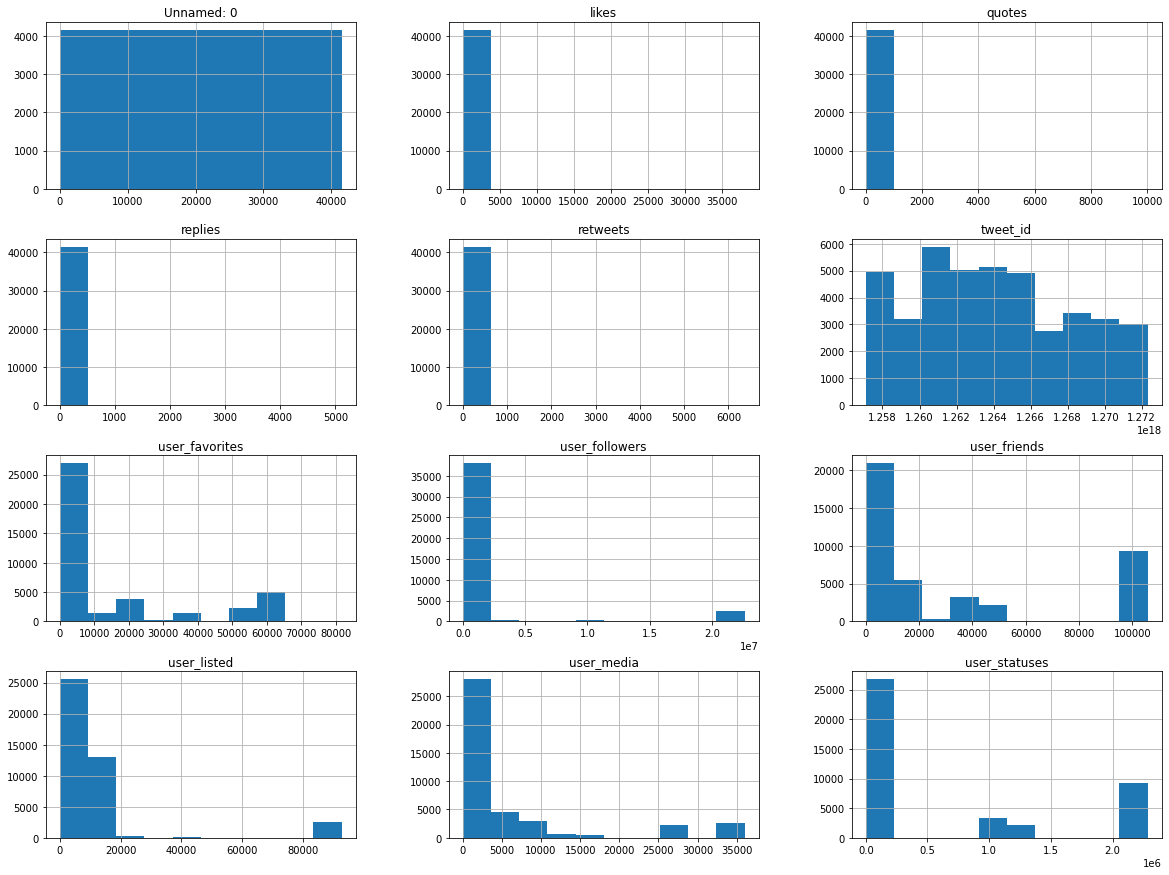

In [44]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=10, figsize=(20,15))
plt.show()

None
